Boosting算法系列
===

# 7.AdaBoost实例

In [1]:
from matplotlib.font_manager import _rebuild
_rebuild()

## 7.1.使用AdaBoost对鸢尾花进行分类

{'learning_rate': 0.1, 'n_estimators': 100}
Score: 0.7333333333333333
准确度: 73.33%


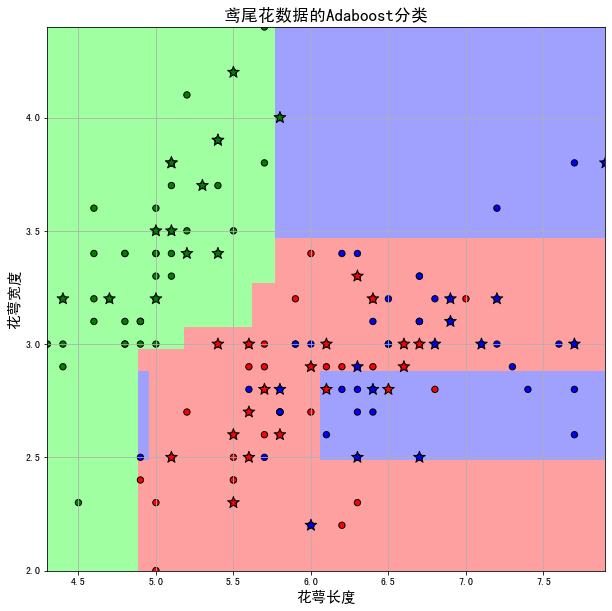

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
import os

mpl.matplotlib_fname()

data_path = os.path.join("data")
# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] ='sans-serif'

data = pd.read_csv(os.path.join(data_path, 'iris.data'), header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 决策树参数估计
base_estimator=[LogisticRegression()]
max_depth = np.arange(1, 10)
algorithm=['SAMME','SAMME.R']
learning_rate = [0.1, 0.5, 1]
n_estimators = [50, 100, 150, 200]
params_list = dict(learning_rate=learning_rate, n_estimators = n_estimators)
cv = StratifiedKFold(4)
cv.get_n_splits(x_train, y_train)

model = GridSearchCV(AdaBoostClassifier(), param_grid=params_list, cv=cv)
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)      # 测试数据
print(model.best_params_)
print('Score:', model.score(x_test, y_test))

# 画图
N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(figsize=(10,10),facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的Adaboost分类', fontsize=17)

# 训练集上的预测结果
y_test = y_test.reshape(-1)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

## 7.2.AdaBoost进行曲线回归

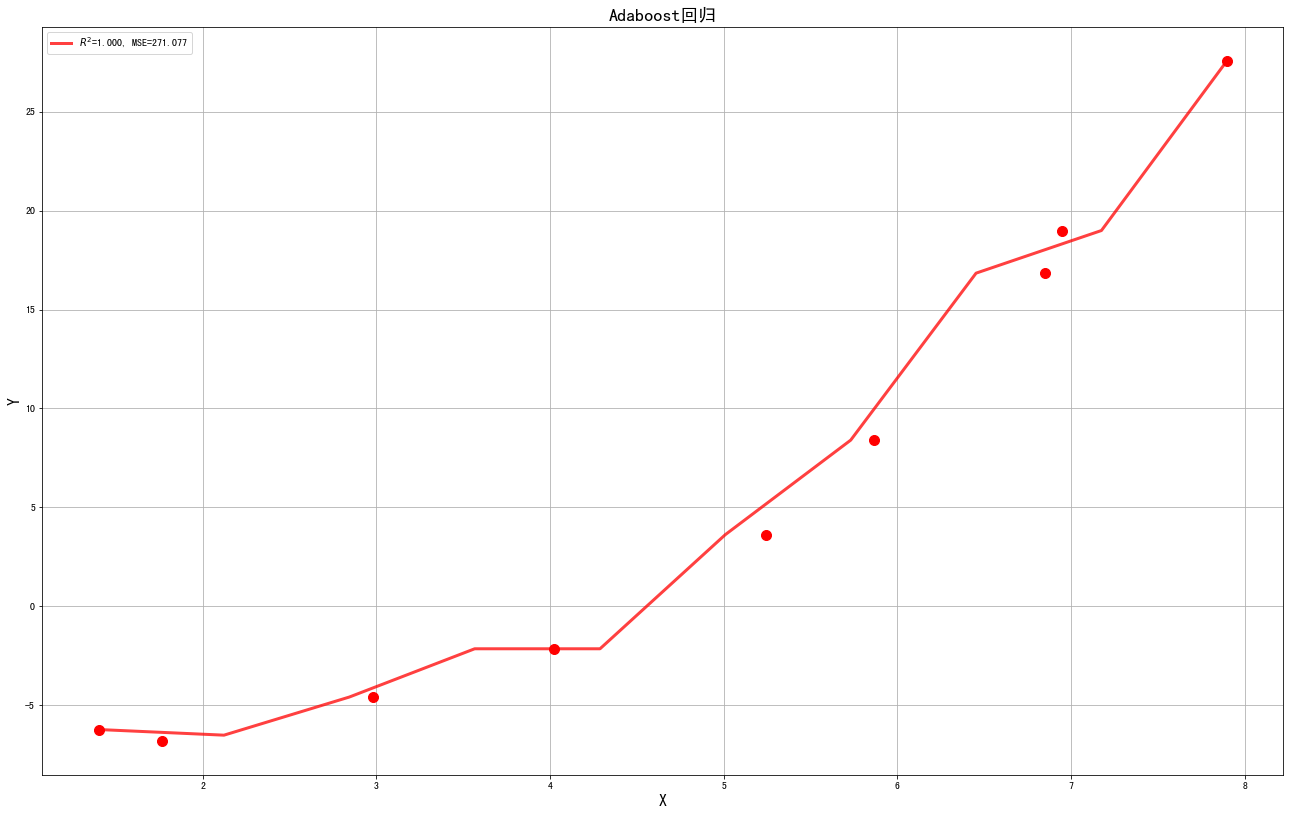

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import AdaBoostRegressor

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

deep_length = 1
model = AdaBoostRegressor(n_estimators=100)
clrs = []  # 颜色
for c in np.linspace(16711680, 255, deep_length):
    clrs.append("#{:06X}".format(int(c), 2))
d_pool = np.arange(1, deep_length + 1, 1)  # 阶

label = 'Adaboost回归'

plt.figure(figsize=(18, 12), facecolor='w')
plt.plot(x, y, 'ro', ms=10, zorder=N)

for i, d in enumerate(d_pool):
    #model.set_params(max_depth=d)
    model.fit(x, y.ravel())

    x_hat = np.linspace(x.min(), x.max(), num=10)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    mse = np.average((y_hat - np.array(y)) ** 2)
    label1 = u'$R^2$=%.3f, MSE=%.3f' % (s, mse)
    plt.plot(x_hat, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label1)

plt.legend(loc='upper left')
plt.grid(True)
plt.title(label, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0, 0, 1, 0.95))

# 8.梯度提升树-GBDT

## 8.1.对鸢尾花数据进行分类

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}
得分:75.56


Text(0.5, 1.0, '鸢尾花数据的GDBT分类')

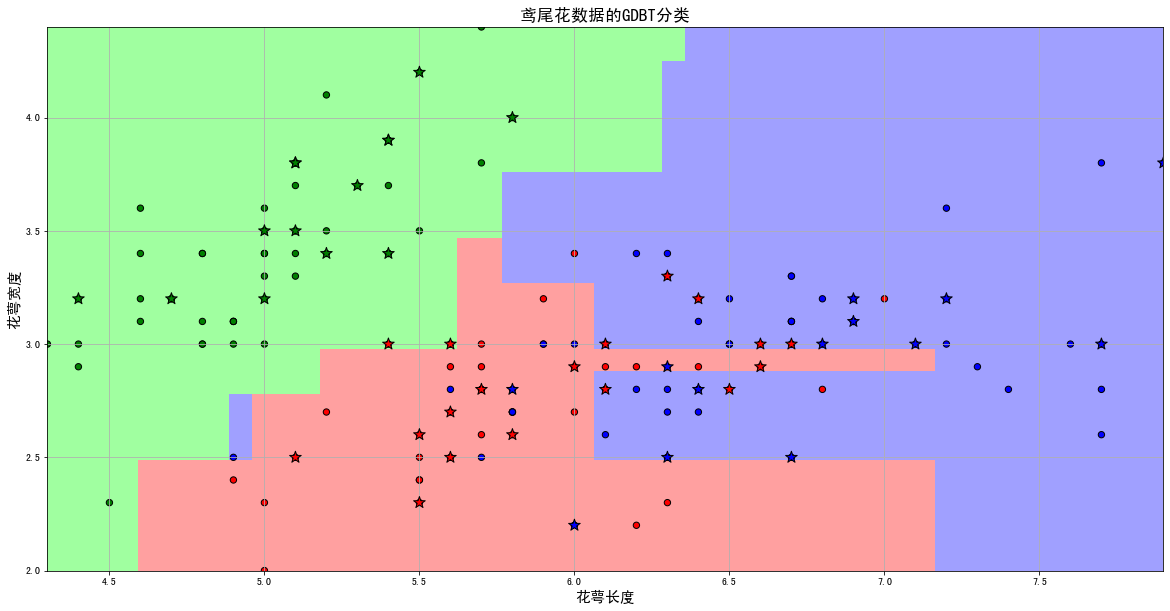

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import os

data_path = os.path.join("data")
# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv(os.path.join(data_path, 'iris.data'), header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 决策树参数估计
max_depth = np.arange(1, 10)
learning_rate = [0.1, 0.5, 1]
n_estimators = [50, 100, 150, 200]
params_list = dict(max_depth = max_depth, learning_rate=learning_rate, n_estimators = n_estimators)
cv = StratifiedKFold(4)
cv.get_n_splits(x_train,y_train)

model = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=params_list, cv=cv)
#使用信息熵来划分子树，gini：使用gini系数划分子树
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)      # 测试数据
print(model.best_params_)
print('得分:%.2f' % (100 * model.score(x_test, y_test)))
# 画图
N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(figsize=(20,10), facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的GDBT分类', fontsize=17)

准确度: 75.56%
1  错误率: 28.89%
2  错误率: 35.56%
3  错误率: 37.78%
4  错误率: 33.33%
5  错误率: 33.33%
6  错误率: 35.56%
7  错误率: 33.33%
8  错误率: 35.56%
9  错误率: 35.56%
10  错误率: 35.56%
11  错误率: 37.78%
12  错误率: 35.56%
13  错误率: 35.56%
14  错误率: 35.56%


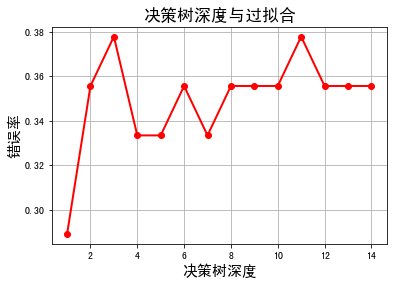

In [5]:
# 训练集上的预测结果
y_test = y_test.reshape(-1)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

# 过拟合：错误率
depth = np.arange(1, 15)
err_list = []
for d in depth:
    clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=d, random_state=0)
    clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)  # 测试数据
    result = (y_test_hat == y_test)  # True则预测正确，False则预测错误

    err = 1 - np.mean(result)
    err_list.append(err)
    print(d, ' 错误率: %.2f%%' % (100 * err))
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel(u'决策树深度', fontsize=15)
plt.ylabel(u'错误率', fontsize=15)
plt.title(u'决策树深度与过拟合', fontsize=17)
plt.grid(True)

## 8.2.进行曲线回归

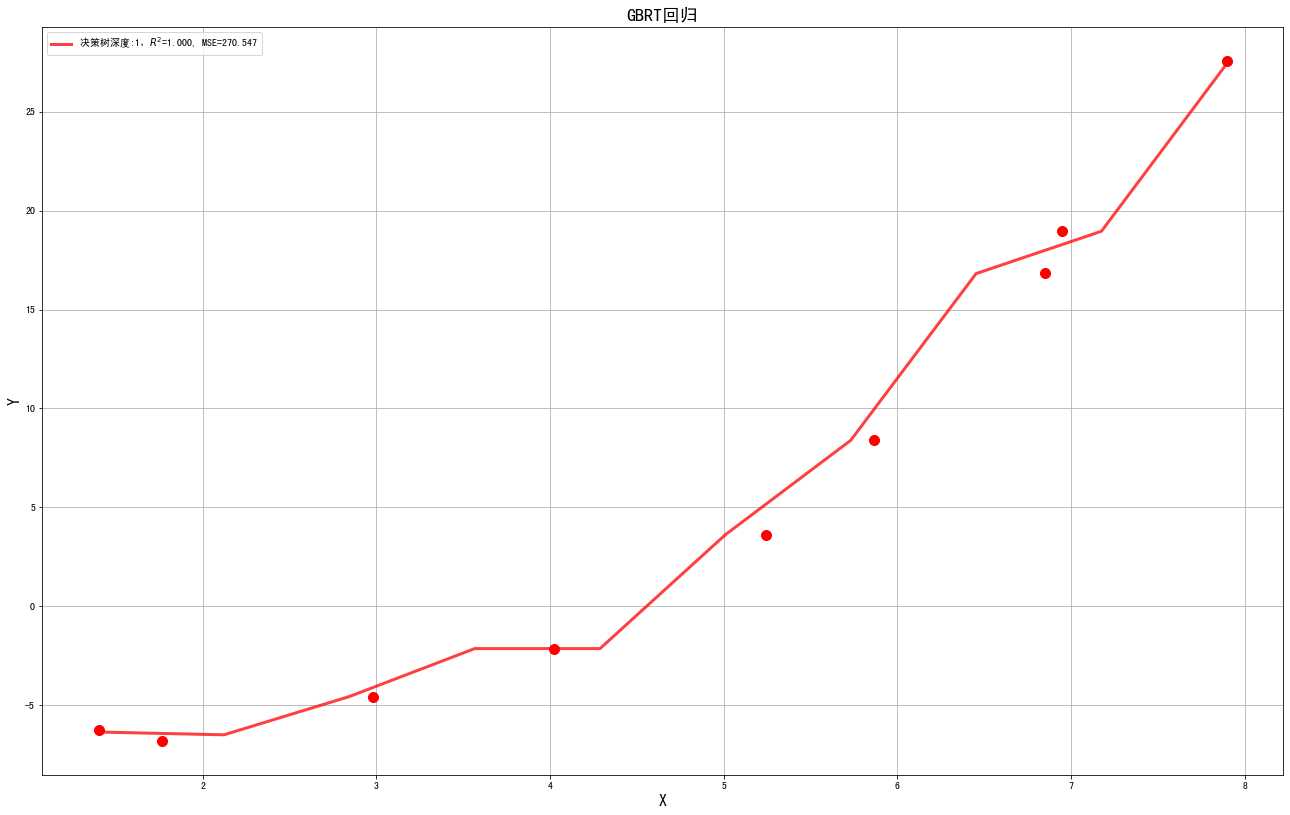

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

deep_length = 1
model = GradientBoostingRegressor(n_estimators=100)
clrs = []  # 颜色
for c in np.linspace(16711680, 255, deep_length):
    clrs.append("#{:06X}".format(int(c), 2))
d_pool = np.arange(1, deep_length + 1, 1)  # 阶

label = 'GBRT回归'

plt.figure(figsize=(18, 12), facecolor='w')
plt.plot(x, y, 'ro', ms=10, zorder=N)

for i, d in enumerate(d_pool):
    model.set_params(max_depth=d)
    model.fit(x, y.ravel())

    x_hat = np.linspace(x.min(), x.max(), num=10)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    mse = np.average((y_hat - np.array(y)) ** 2)
    label1 = u'决策树深度:%d，$R^2$=%.3f, MSE=%.3f' % (d, s, mse)
    plt.plot(x_hat, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label1)

plt.legend(loc='upper left')
plt.grid(True)
plt.title(label, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.tight_layout(1, rect=(0, 0, 1, 0.95))

# 9.使用Python Code实现梯度提升树

In [7]:
import numpy as np
import math

class DecisionNode():
    def __init__(self, feature_i=None, threshold=None,value=None, true_branch=None, false_branch=None):
        self.feature_i = feature_i
        self.threshold = threshold
        self.value = value
        self.true_branch = true_branch
        self.false_branch = false_branch

class DecisionTree(object):
    def __init__(self, min_samples_split=2, min_impurity=1e-7,max_depth=float("inf"), loss=None):
        self.root = None  #根节点
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        # 计算值 如果是分类问题就是信息增益，回归问题就基尼指数
        self._impurity_calculation = None
        self._leaf_value_calculation = None #计算叶子
        self.one_dim = None
        self.loss = loss

    def fit(self, X, y, loss=None):
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss=None

    def _build_tree(self, X, y, current_depth=0):
        """
        递归求解树
        """
        largest_impurity = 0
        best_criteria = None
        best_sets = None

        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        Xy = np.concatenate((X, y), axis=1)

        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # 计算每一个特征的增益值
            for feature_i in range(n_features):
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                for threshold in unique_values:
                    Xy1, Xy2 = self.divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # 计算增益值
                        impurity = self._impurity_calculation(y, y1, y2)

                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],
                                "lefty": Xy1[:, n_features:],
                                "rightX": Xy2[:, :n_features],
                                "righty": Xy2[:, n_features:]
                            }

        if largest_impurity > self.min_impurity:
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                "threshold"], true_branch=true_branch, false_branch=false_branch)

        # 计算节点的目标值
        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)

    def predict_value(self, x, tree=None):
        """
        预测
        """
        if tree is None:
            tree = self.root

        if tree.value is not None:
            return tree.value

        feature_value = x[tree.feature_i]

        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        return self.predict_value(x, branch)

    def divide_on_feature(self, X, feature_i, threshold):
        split_func = None
        if isinstance(threshold, int) or isinstance(threshold, float):
            split_func = lambda sample: sample[feature_i] >= threshold
        else:
            split_func = lambda sample: sample[feature_i] == threshold

        X_1 = np.array([sample for sample in X if split_func(sample)])
        X_2 = np.array([sample for sample in X if not split_func(sample)])

        return np.array([X_1, X_2])

    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.predict_value(x))
        return y_pred

def calculate_entropy(y):
    log2 = math.log2
    unique_labels = np.unique(y)
    entropy = 0
    for label in unique_labels:
        count = len(y[y == label])
        p = count / len(y)
        entropy += -p * log2(p)
    return entropy

## 9.1.分类

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def calculate_variance(X):
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))

    return variance

class RegressionTree(DecisionTree):
    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # 使用方差缩减
        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)

class GradientBoosting(object):
    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 min_impurity, max_depth, regression):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.regression = regression

        self.loss = CrossEntropy()

        self.trees = []
        for _ in range(n_estimators):
            tree = RegressionTree(
                min_samples_split=self.min_samples_split,
                min_impurity=min_impurity,
                max_depth=self.max_depth)
            self.trees.append(tree)

    def fit(self, X, y):
        y_pred = np.full(np.shape(y), np.mean(y, axis=0))
        for i in range(self.n_estimators):
            gradient = self.loss.gradient(y, y_pred)
            self.trees[i].fit(X, gradient)
            update = self.trees[i].predict(X)
            # Update y prediction
            y_pred -= np.multiply(self.learning_rate, update)

    def predict(self, X):
        y_pred = np.array([])
        for tree in self.trees:
            update = tree.predict(X)
            update = np.multiply(self.learning_rate, update)
            y_pred = -update if not y_pred.any() else y_pred - update

        if not self.regression:
            y_pred = np.exp(y_pred) / np.expand_dims(np.sum(np.exp(y_pred), axis=1), axis=1)
            y_pred = np.argmax(y_pred, axis=1)
        return y_pred

class Loss(object):
    def loss(self, y_true, y_pred):
        return NotImplementedError()

    def gradient(self, y, y_pred):
        raise NotImplementedError()

    def acc(self, y, y_pred):
        return 0

class CrossEntropy(Loss):
    def __init__(self): pass

    def loss(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - y * np.log(p) - (1 - y) * np.log(1 - p)

    def acc(self, y, p):
        return accuracy_score(np.argmax(y, axis=1), np.argmax(p, axis=1))

    def gradient(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - (y / p) + (1 - y) / (1 - p)



class GradientBoostingClassifier(GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=.5, min_samples_split=2,
                 min_info_gain=1e-7, max_depth=2, debug=False):
        super(GradientBoostingClassifier, self).__init__(n_estimators=n_estimators,
                                                         learning_rate=learning_rate,
                                                         min_samples_split=min_samples_split,
                                                         min_impurity=min_info_gain,
                                                         max_depth=max_depth,
                                                         regression=False)

    def fit(self, X, y):
        y = to_categorical(y)
        super(GradientBoostingClassifier, self).fit(X, y)
def to_categorical(x, n_col=None):
    """ One-hot encoding of nominal values """
    if not n_col:
        n_col = np.amax(x) + 1
    one_hot = np.zeros((x.shape[0], n_col))
    one_hot[np.arange(x.shape[0]), x] = 1
    return one_hot

data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9666666666666667


## 9.2.回归

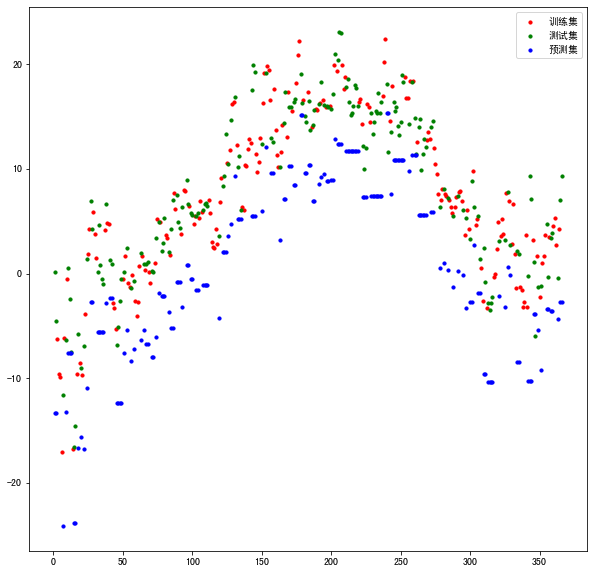

In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import matplotlib as mpl
import os

data_path = os.path.join("data")
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

def calculate_variance(X):
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))

    return variance
class RegressionTree(DecisionTree):
    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # 使用方差缩减
        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)

class GradientBoosting(object):
    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 min_impurity, max_depth, regression):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.regression = regression

        self.loss = SquareLoss()

        self.trees = []
        for _ in range(n_estimators):
            tree = RegressionTree(
                min_samples_split=self.min_samples_split,
                min_impurity=min_impurity,
                max_depth=self.max_depth)
            self.trees.append(tree)

    def fit(self, X, y):
        y_pred = np.full(np.shape(y), np.mean(y, axis=0))
        for i in range(self.n_estimators):
            gradient = self.loss.gradient(y, y_pred)
            self.trees[i].fit(X, gradient)
            update = self.trees[i].predict(X)
            # Update y prediction
            y_pred -= np.multiply(self.learning_rate, update)

    def predict(self, X):
        y_pred = np.array([])
        for tree in self.trees:
            update = tree.predict(X)
            update = np.multiply(self.learning_rate, update)
            y_pred = -update if not y_pred.any() else y_pred - update

        if not self.regression:
            y_pred = np.exp(y_pred) / np.expand_dims(np.sum(np.exp(y_pred), axis=1), axis=1)
            y_pred = np.argmax(y_pred, axis=1)
        return y_pred

class Loss(object):
    def loss(self, y_true, y_pred):
        return NotImplementedError()

    def gradient(self, y, y_pred):
        raise NotImplementedError()

    def acc(self, y, y_pred):
        return 0

class SquareLoss(Loss):
    def __init__(self): pass

    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)

    def gradient(self, y, y_pred):
        return -(y - y_pred)

class GradientBoostingRegressor(GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=0.5, min_samples_split=2,
                 min_var_red=1e-7, max_depth=4, debug=False):
        super(GradientBoostingRegressor, self).__init__(n_estimators=n_estimators,
                                                        learning_rate=learning_rate,
                                                        min_samples_split=min_samples_split,
                                                        min_impurity=min_var_red,
                                                        max_depth=max_depth,
                                                        regression=True)

data = pd.read_csv(os.path.join(data_path, 'MyData.txt'), sep="\t")
time = np.atleast_2d(data["time"].values).T
temp = np.atleast_2d(data["temp"].values).T

X = time.reshape((-1, 1))               # Time. Fraction of the year [0, 1]
X = np.insert(X, 0, values=1, axis=1)   # Insert bias term
y = temp[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_line = model.predict(X)
mse = mean_squared_error(y_test, y_pred)
plt.figure(figsize=(10,10), facecolor='w')

m1 = plt.scatter(366 * X_train[:, 1],y_train, c='r',s=10, label=u'训练集')
m2 = plt.scatter(366 * X_test[:, 1], y_test,c='g',s=10, label=u'测试集')
m3 = plt.scatter(366 * X_test[:, 1], y_pred,c='b',s=10, label=u'预测集')
plt.legend(loc='best')